In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

path = '.data/'
def get_ds_infos():
    ## 0:Code, 1:Weight, 2:Height, 3:Age, 4:Gender
    file = path + 'data_subjects_info.csv'
    dss = pd.read_csv(file, sep=',')
    print("Subjects data is imported.")
    return dss.get_values()

In [5]:
act_numeric = {"dws":0, "ups":1, "wlk":2, "jog":3, "std":4, "sit":5}
trial_codes = {"dws":[1,2,11], "ups":[3,4,12], "wlk":[7,8,15], "jog":[9,16], "std":[6,14], "sit":[5,13]}    

In [6]:
ds_list = get_ds_infos()

Subjects data is imported.


Add 'Action' 'Gender' 'BMI' column

In [7]:
all_data = []

for sub_id, gender, weight, height in zip(ds_list[:,0], ds_list[:,4], ds_list[:,1], ds_list[:,2]):
    for act in list(act_numeric.keys()):
        for trial in trial_codes[act]:
            directory = 'A_DeviceMotion_data/'
            fname = path + directory +act+'_'+str(trial)+'/sub_'+str(int(sub_id))+'.csv'
            motion = pd.read_csv(fname)
            motion = motion.drop(motion.columns[0], axis=1)
            '''
            directory = 'B_Accelerometer_data/'
            fname = path + directory +act+'_'+str(trial)+'/sub_'+str(int(sub_id))+'.csv'
            accelerometer = pd.read_csv(fname)
            accelerometer = accelerometer.drop(accelerometer.columns[0], axis=1)
            accelerometer.rename(columns=lambda x: 'accelerometer.' + x, inplace=True)
            
            directory = 'C_Gyroscope_data/'
            fname = path + directory +act+'_'+str(trial)+'/sub_'+str(int(sub_id))+'.csv'
            gyroscope = pd.read_csv(fname)
            gyroscope = gyroscope.drop(gyroscope.columns[0], axis=1)
            gyroscope.rename(columns=lambda x: 'gyroscope.' + x, inplace=True)
            
            raw_data = pd.concat([motion, accelerometer, gyroscope], axis=1)'''
            raw_data = motion
            raw_data['act'] = act_numeric[act]
            raw_data['gender'] = gender
            raw_data['BMI'] = weight/(height*height)*10000
            all_data.append(raw_data)

In [8]:
all_data[0]

attitude.roll  attitude.pitch  attitude.yaw  gravity.x  gravity.y  \
0          1.528132       -0.733896      0.696372   0.741895   0.669768   
1          1.527992       -0.716987      0.677762   0.753099   0.657116   
2          1.527765       -0.706999      0.670951   0.759611   0.649555   
3          1.516768       -0.704678      0.675735   0.760709   0.647788   
4          1.493941       -0.703918      0.672994   0.760062   0.647210   
5          1.476302       -0.700807      0.669443   0.760912   0.644835   
6          1.455153       -0.694408      0.662593   0.763300   0.639930   
7          1.441702       -0.690710      0.656459   0.764380   0.637084   
8          1.443440       -0.691905      0.651196   0.763796   0.638005   
9          1.443071       -0.693039      0.638198   0.763042   0.638878   
10         1.434186       -0.693527      0.616938   0.761832   0.639253   
11         1.412539       -0.691930      0.592240   0.760394   0.638024   
12         1.366432       -0.686835      0.562806   0.757165   0.634093   
13         1.298239       -0.676703      0.533675   0.750862   0.626226   
14         1.222763       -0.660279      0.512970   0.742468   0.613337   
15         1.137867       -0.639672      0.490227   0.728273   0.596932   
16         1.059596       -0.623715      0.476399   0.707943   0.584055   
17         1.002833       -0.624159      0.478032   0.684055   0.584415   
18         0.955538       -0.628684      0.480025   0.660488   0.588081   
19         0.923844       -0.640685      0.484397   0.639685   0.597745   
20         0.916433       -0.655642      0.491873   0.628922   0.609668   
21         0.936385       -0.671650      0.504363   0.630480   0.622279   
22         0.983451       -0.696289      0.529890   0.638651   0.641375   
23         1.046790       -0.725263      0.565948   0.647916   0.663332   
24         1.129694       -0.752479      0.604115   0.660123   0.683451   
25         1.231014       -0.786512      0.649841   0.665937   0.707894   
26         1.347834       -0.829441      0.717322   0.658573   0.737554   
27         1.446529       -0.862922      0.799754   0.645207   0.759745   
28         1.459509       -0.867270      0.852132   0.642909   0.762566   
29         1.429740       -0.853959      0.860604   0.650478   0.753887   
...             ...             ...           ...        ...        ...   
1721       1.015062       -0.420704      2.790430   0.775437   0.408403   
1722       1.045579       -0.443105      2.795900   0.781656   0.428747   
1723       1.086896       -0.465360      2.805285   0.791056   0.448744   
1724       1.129458       -0.483739      2.808771   0.800437   0.465092   
1725       1.153063       -0.495000      2.799305   0.804301   0.475032   
1726       1.155486       -0.497625      2.792395   0.804020   0.477340   
1727       1.136521       -0.500547      2.789860   0.795883   0.479906   
1728       1.126995       -0.497566      2.807356   0.793619   0.477288   
1729       1.120294       -0.488976      2.830203   0.794735   0.469722   
1730       1.122043       -0.478879      2.842257   0.799639   0.460784   
1731       1.139040       -0.486342      2.828619   0.802921   0.467395   
1732       1.151124       -0.512281      2.784718   0.795991   0.490166   
1733       1.166244       -0.525624      2.755022   0.795186   0.501753   
1734       1.200369       -0.527437      2.728611   0.805490   0.503320   
1735       1.254308       -0.529617      2.686727   0.820139   0.505203   
1736       1.334520       -0.534949      2.643867   0.836392   0.509797   
1737       1.422465       -0.538370      2.607585   0.849118   0.512738   
1738       1.495848       -0.534125      2.567471   0.858298   0.509088   
1739       1.562207       -0.535579      2.539257   0.859942   0.510339   
1740       1.602650       -0.537863      2.508996   0.858370   0.512302   
1741       1.634509       -0.539902      2.480230   0.856019   0.514052   
1742       1.671799       -0.54

Plot all TS for item

Plot data for:
Activity=wlk
Gender=1


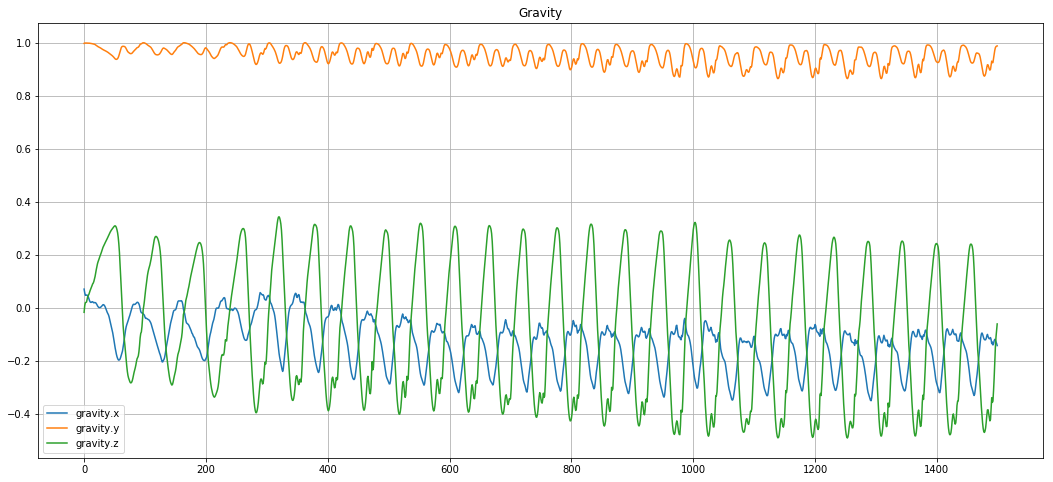

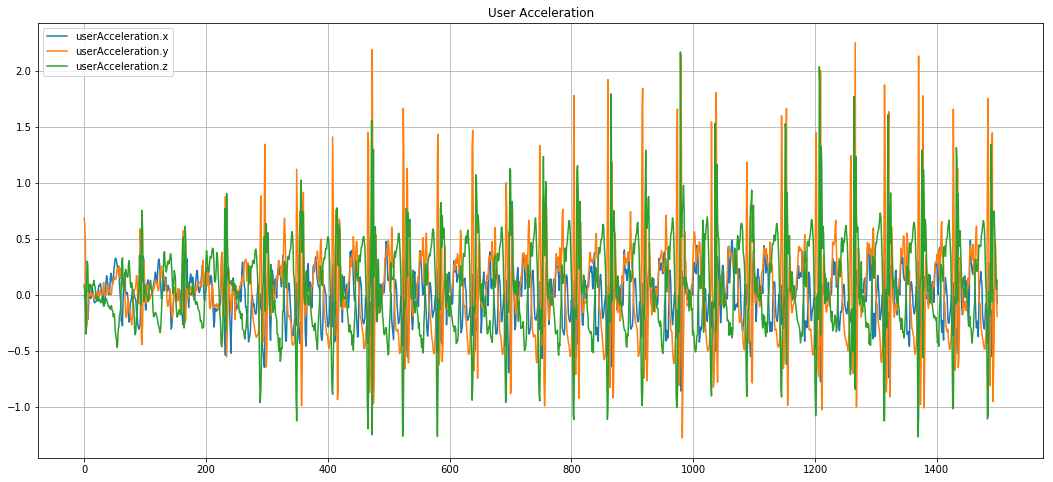

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
select_index = 61
plt_data = all_data[select_index]
print('Plot data for:\nActivity=%s\nGender=%i' % (plt_data['act'][0], plt_data['gender'][0]))

titles = ['Attitude', 'Gravity', 'Rotation Rate', 'User Acceleration']
for i, title in enumerate(titles):
    j = i*3
    plt.figure(figsize=(18, 8))
    plt.plot(plt_data[plt_data.columns[j:j+3]][0:1500])
    plt.legend(plt_data.columns[j:j+3])
    plt.grid('on')
    plt.title(title)
    plt.show()
    #indexes = [i, i+3]

Plot data for:
Activity=wlk
Gender=0


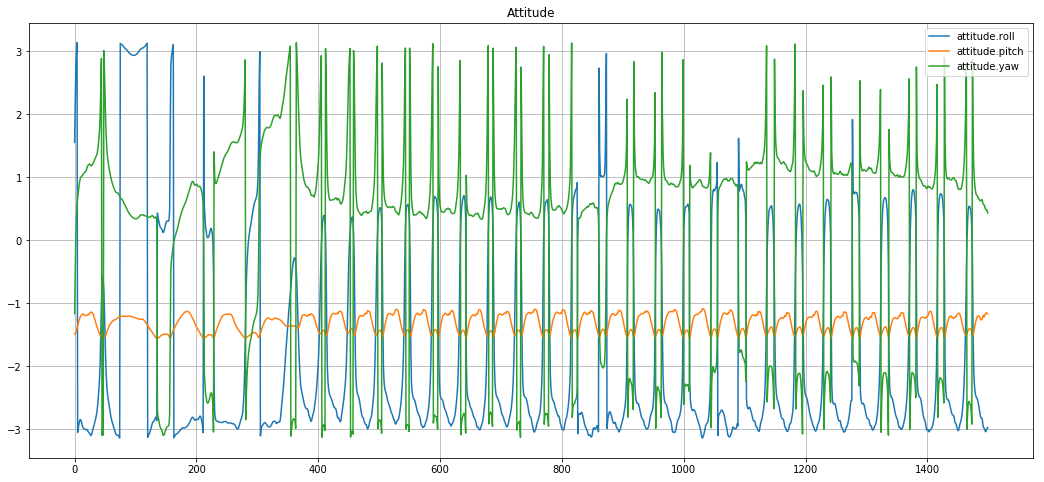

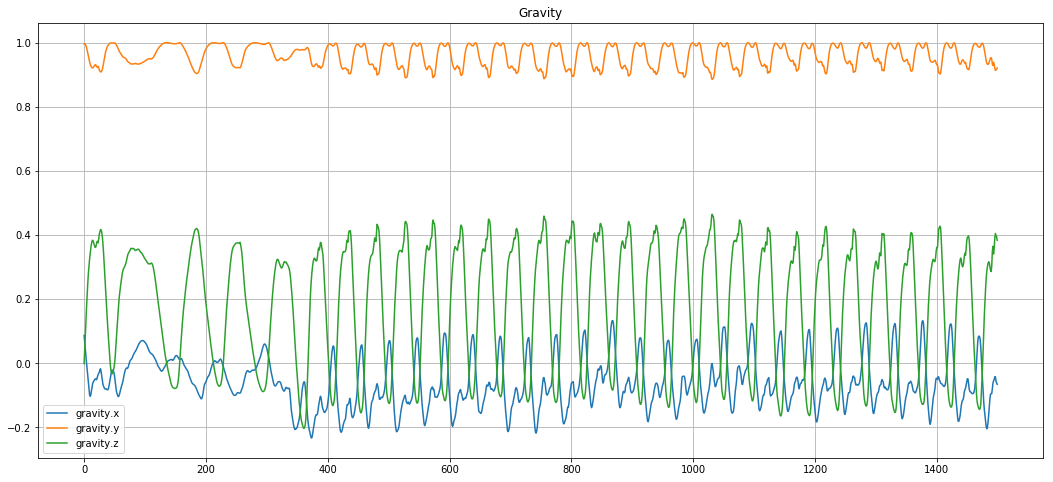

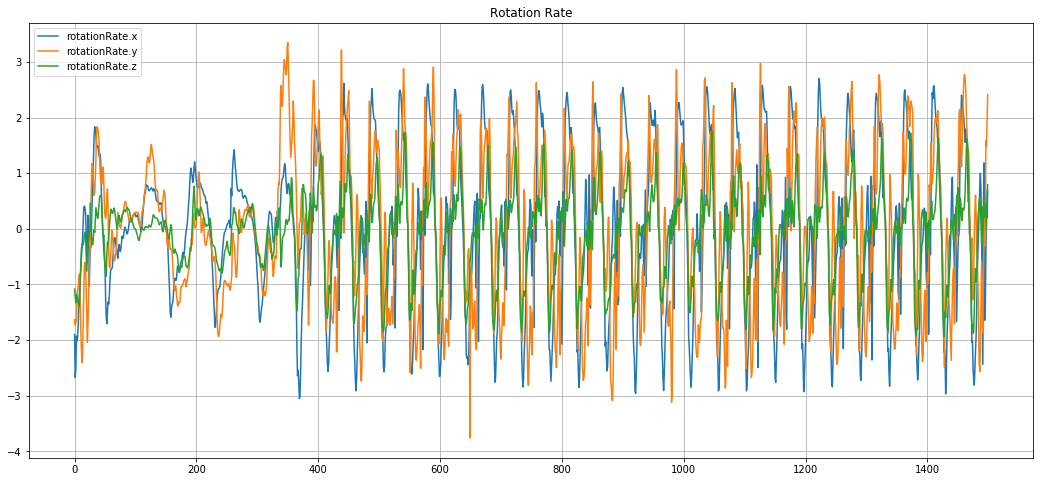

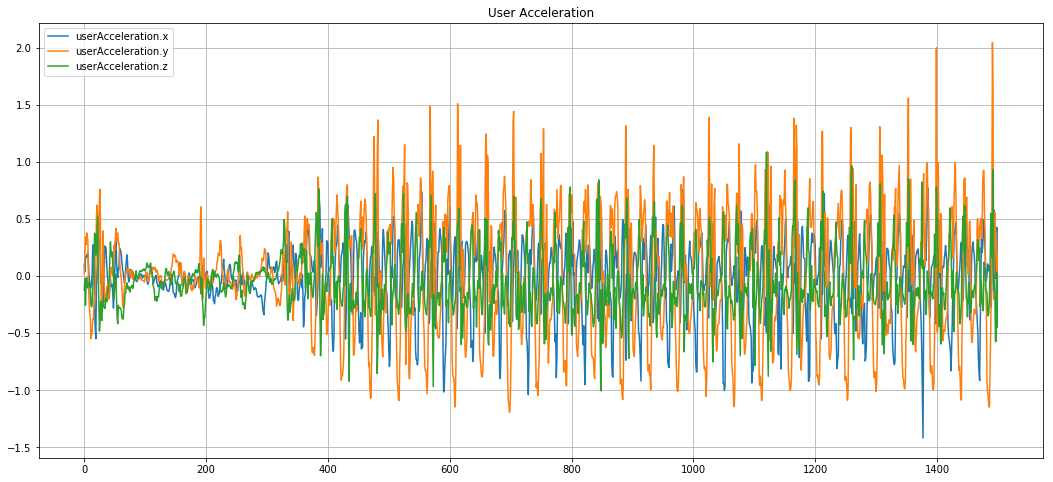

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt
select_index = 50
plt_data = all_data[select_index]
print('Plot data for:\nActivity=%s\nGender=%i' % (plt_data['act'][0], plt_data['gender'][0]))

titles = ['Attitude', 'Gravity', 'Rotation Rate', 'User Acceleration']
for i, title in enumerate(titles):
    j = i*3
    plt.figure(figsize=(18, 8))
    plt.plot(plt_data[plt_data.columns[j:j+3]][0:1500])
    plt.legend(plt_data.columns[j:j+3])
    plt.grid('on')
    plt.title(title)
    plt.show()
    #indexes = [i, i+3]


Функция разбивки

In [46]:
def split_ts(all_ts, act_labels, gen_labels=None, bmi_labels=None, slide_size=200, step=20, flat=False, verbose=False):
    split_ts = []
    act_split_labels = []
    gen_split_labels = []
    bmi_split_labels = []
    for (ts, act, gen, bmi) in zip(all_ts, act_labels, gen_labels, bmi_labels):
        ts_size = len(ts)
        i = 0
        j = i+slide_size
        num_sect = 0 
        while j < ts_size-1:
            if flat:
                section = ts[i:j].flatten()
            else:
                section = ts[i:j]
            split_ts.append(section)
            act_split_labels.append(act)
            gen_split_labels.append(gen)
            bmi_split_labels.append(bmi)
            i += step
            j += step
            num_sect += 1

        if verbose:
            print('label = %s len = %i' % (label, ts_size))
            print('num sect = %i' % (num_sect))
    return split_ts, act_split_labels, gen_split_labels, bmi_split_labels

In [51]:
data = []
act_target = []
#act_string_target = []
gen_target = []
bmi_target = []

for i, i_data in enumerate(all_data):
    data.append(i_data.get_values()[:,:12])
    act_target.append(i_data['act'][0])
    #act_string_target.append(i_data['act'][0])
    gen_target.append(i_data['gender'][0]) 
    bmi_target.append(i_data['BMI'][0])

In [75]:
ts, act_labels, gen_labels, bmi_labels = split_ts(all_ts=data, act_labels=act_target, gen_labels=gen_target, bmi_labels=bmi_target, flat=True)

*Если не разбивать а обрезать по минимальному*

In [13]:
sizes = np.array(list(data.shape[0] for data in all_data))

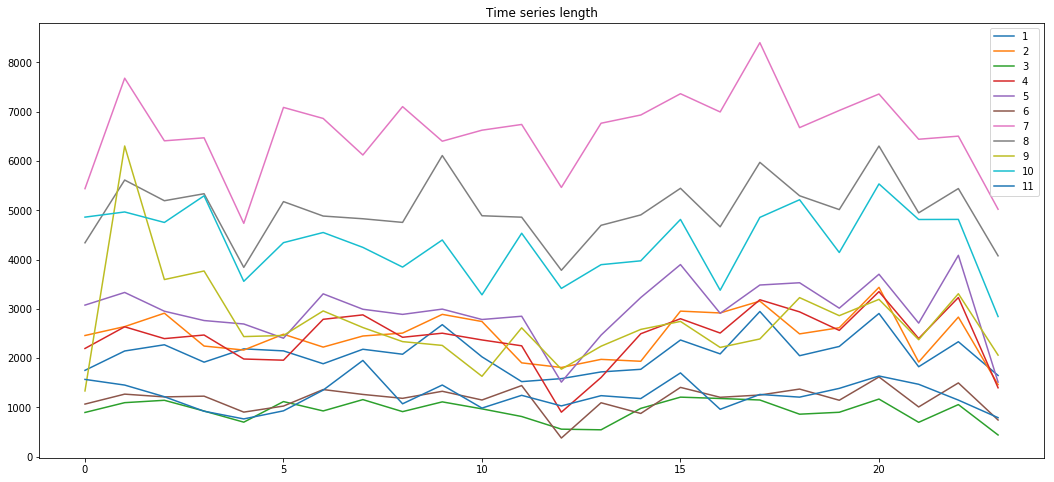

In [27]:
sizes = sizes.reshape((24,11))
plt.figure(figsize=(18, 8))
plt.plot(np.arange(0,len(sizes)), sizes)
plt.title('Time series length')
plt.legend(range(1,24))
plt.show()

In [10]:
def plot_ts(plt_data, j=0):
    plt.figure(figsize=(18, 8))
    plt.plot(plt_data[plt_data.columns[j:j+3]])
    plt.legend(plt_data.columns[j:j+3])
    plt.grid('on')
    plt.title(str(plt_data.shape[0]) + " Act = " + plt_data['act'][0])
    plt.show()

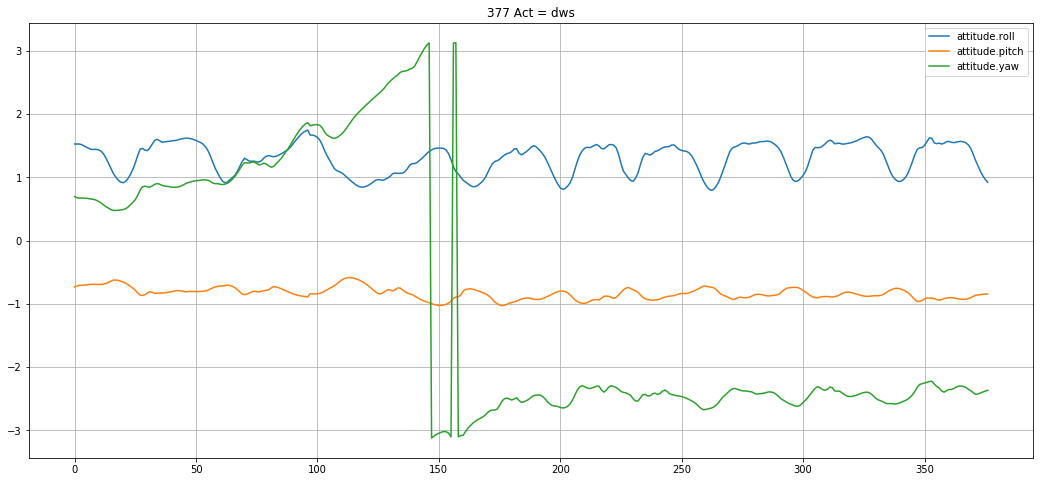

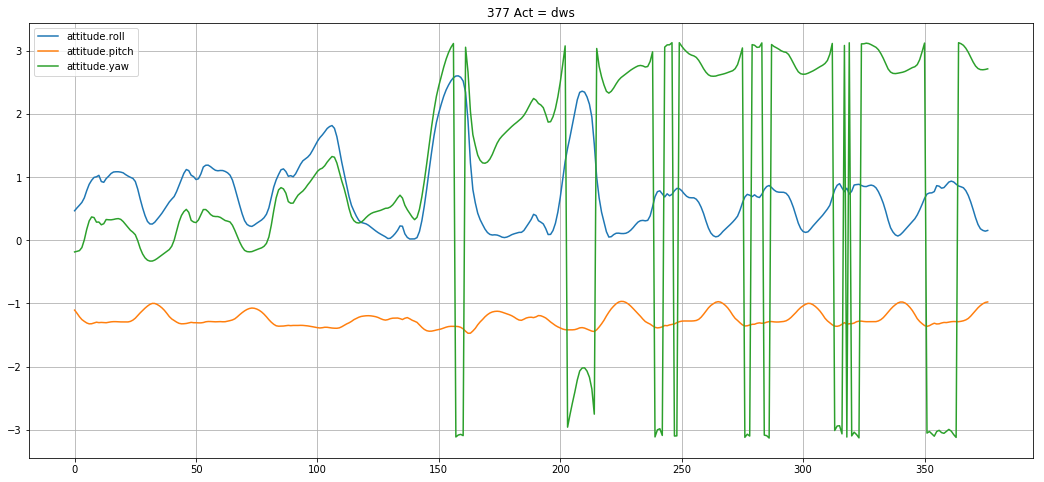

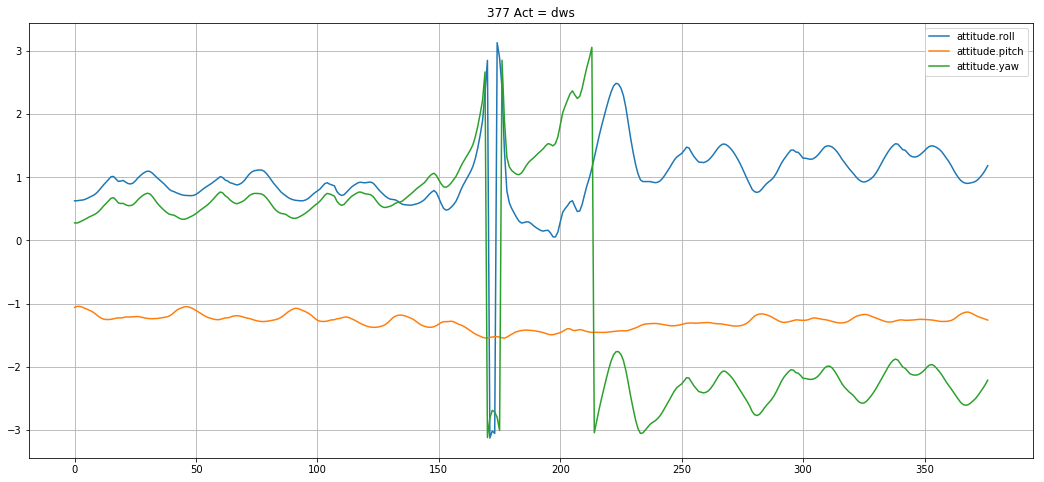

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
index_1 = 0
plt_data_1 = all_data[index_1]
plt_data_2 = all_data[index_1+11*1]
plt_data_3 = all_data[index_1+11*2]
#print('Plot data for:\nActivity=%s\nGender=%i' % (plt_data['act'][0], plt_data['gender'][0]))
#titles = list(str(data['act'][0] + data.shape[0]
#titles = ['Attitude', 'Gravity', 'Rotation Rate', 'User Acceleration']

plot_ts(plt_data_1.head(n=np.min(sizes))) 
plot_ts(plt_data_2.head(n=np.min(sizes)))
plot_ts(plt_data_3.head(n=np.min(sizes)))

*Обрезанные по минимальному (num_train=11x14, ts_length=377) 

In [29]:
crop_edge = np.min(sizes)

In [30]:
crop_data = list(data.head(crop_edge) for data in all_data)

Данные в all_data располагаются последовательно (все действия для каждого испытуемого). 

Данные для обучения

In [68]:
data = []
act_target = []
act_string_target = []
gen_target = []
act_numeric = {"dws":0, "ups":1, "wlk":2, "jog":3}
for i, i_data in enumerate(crop_data):
    data.append(i_data.get_values()[:,:12].flatten())
    act_target.append(act_numeric[i_data['act'][0]])
    act_string_target.append(i_data['act'][0])
    gen_target.append(i_data['gender'][0]) 

### Классификация обрезанных данных

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold, cross_val_score

neigh = KNeighborsRegressor(n_neighbors=5, weights='distance')
kf = KFold(n_splits=5, shuffle=True, random_state=42)
parameters = np.linspace(1,10,200)
results = []

for p in parameters:
    neigh.p = p
    results.append(np.max(cross_val_score(neigh, data, act_target, cv=kf, scoring='neg_mean_squared_error', verbose=2)))

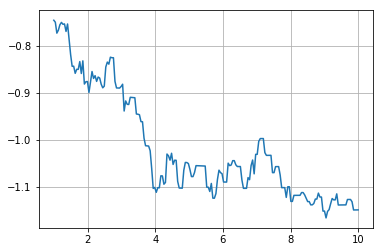

In [12]:
from matplotlib import pyplot as plt
plt.plot(parameters, results)
plt.grid('on')
plt.show()

KNeighborsClassifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(weights='distance')
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results_scaled = []
X = np.array(data)
y = np.array(act_string_target)
for i in range(1, 21):
    neigh.n_neighbors = i
    results_scaled.append(np.mean(cross_val_score(neigh, X, y, cv=kf, scoring='accuracy')))

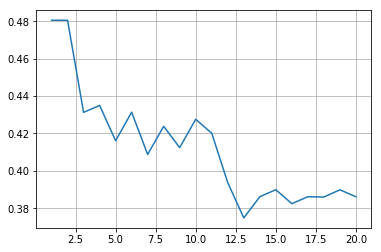

In [49]:
from matplotlib import pyplot as plt
plt.plot(range(1, 21), results_scaled)
plt.grid('on')
plt.show()

SVC

In [ ]:
from sklearn.svm import LinearSVC, NuSVC
svc = LinearSVC()
X = np.array(data)
y = np.array(act_string_target)

nusvc = NuSVC(kernel='sigmoid')
C_s = np.linspace(0.00001, 100, 100)
nus = np.linspace(0.1,0.9,40)
results = []
for C in C_s:
    svc.C = C
    results.append(np.mean(cross_val_score(svc, X, y, scoring='accuracy', verbose=2)))

#for nu in nus:
#    nusvc.nu = nu
#    results.append(np.mean(cross_val_score(nusvc, X, y, scoring='accuracy', verbose=1)))

#plt.plot(nus, results)
plt.plot(C_s, results)
plt.grid('on')
plt.show()


In [10]:
from sklearn.svm import NuSVC
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
X = np.array(ts)
y = np.array(labels)

nusvc = NuSVC()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_nusvc=[]
#scaled = []
nus = np.linspace(0.1,0.76,40)
print ('Start!')
for nu in nus:
    nusvc.nu = nu
    results_nusvc.append(np.mean(cross_val_score(nusvc, X, y, cv=kf, scoring='accuracy', verbose=2)))
    #scaled.append(np.mean(cross_val_score(nusvc, scale(X, axis=0), y, cv=kf, scoring='accuracy', verbose=0)))
plt.plot(nus, results_nusvc)
plt.grid('on')
plt.show()
print('NuSVC:')
print('Best accuracy = %.4f (nu = %.3f)' % (np.max(results_nusvc), nus[np.argmax(results_nusvc)]))

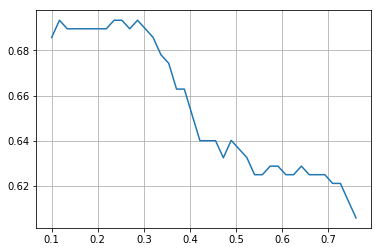

NuSVC:
Best accuracy = 0.6933 (nu = 0.117)


In [19]:
plt.plot(nus, scaled)
plt.grid('on')
plt.show()
print('NuSVC:')
print('Best accuracy = %.4f (nu = %.3f)' % (np.max(scaled), nus[np.argmax(scaled)]))

Look at BMI

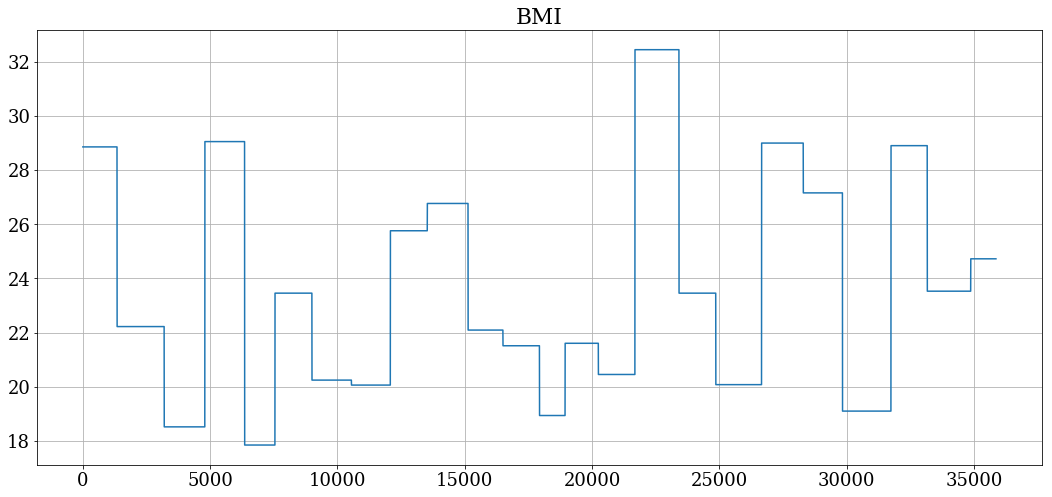

In [58]:
plt.rc('font', family='serif', size=18)
plt.figure(figsize=(18, 8))
plt.plot(range(0, len(bmi_labels)), bmi_labels)
plt.grid('on')
plt.title('BMI')
plt.show()

In [106]:
BMI_value = ['Underweight', 'Normal', 'Overweight', 'Moderately obese']
bound = np.array([18.5, 25, 30])
bmi_buck = bound.searchsorted(np.array(bmi_labels))

In [105]:
np.unique(bmi_buck, return_counts=True)

(array([1, 2, 3, 4]), array([ 1192, 22383, 10558,  1730]))